#### Imports

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

#### Constants

In [14]:
TOTAL_AMBA_SPECS = 9
TOTAL_SYNTECH15_UNREAL_SPECS = 14
TOTAL_SYNTECH15_1UNREAL_SPECS = 130

#### Utils

In [15]:
def display_percentage_specs_repaired(benchmark_name, total_specs):
    # Read the benchmark summary data from the CSV file
    summary_file = f"outputs/{benchmark_name}/benchmark_summary_{benchmark_name}.csv"
    
    if not os.path.exists(summary_file):
        print("File does not exist:", summary_file)
        return

    summary_df = pd.read_csv(summary_file)

    # Calculate the percentage repaired for each algorithm
    summary_df["PercentageRepaired"] = (summary_df["NumRepaired"] / total_specs) * 100

    # Create the markdown table
    markdown_text = ""
    markdown_text += "| Algorithm | Num Repaired | Percentage Repaired |\n"
    markdown_text += "|-----------|--------------|--------------------|\n"
    for index, row in summary_df.iterrows():
        algorithm = row["Algorithm"]
        num_repaired = row["NumRepaired"]
        percentage_repaired = row["PercentageRepaired"]
        markdown_text += f"| {algorithm} | {num_repaired} | {percentage_repaired:.1f}% |\n"

    # Display the markdown table
    display(Markdown(markdown_text))

def plot_num_specs_repaired(benchmark_name):
    summary_file = f"outputs/{benchmark_name}/benchmark_summary_{benchmark_name}.csv"

    if not os.path.exists(summary_file):
        print("File does not exist:", summary_file)
        return

    summary_df = pd.read_csv(summary_file)

    # Plot the bar graph
    plt.figure(figsize=(10, 5))
    bars = plt.bar(summary_df["Algorithm"], summary_df["NumRepaired"])
    plt.xlabel("Algorithm", fontsize=12)
    plt.ylabel("# Specifications", fontsize=12)
    plt.title(f"Number of Specifications Repaired in {benchmark_name}", fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

    # Add numbers above each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha="center", va="bottom", fontsize=12)

    # Display the plot
    plt.tight_layout()
    plt.show()


def display_percentage_small_repairs(benchmark_name):
    # Read the benchmark summary data from the CSV file
    summary_file = f"outputs/{benchmark_name}/benchmark_summary_{benchmark_name}.csv"
    summary_df = pd.read_csv(summary_file)

    # Create the markdown table
    markdown_text = ""
    markdown_text += "| Algorithm | Num Repaired | Num Small Repairs | Percentage Small Repairs |\n"
    markdown_text += "|-----------|--------------|-------------------|-------------------------|\n"
    for index, row in summary_df.iterrows():
        algorithm = row["Algorithm"]
        num_repaired = row["NumRepaired"]
        num_small_repairs = row["NumSmallRepairs"]
        
        if num_repaired > 0:
            percentage_small_repairs = (num_small_repairs / num_repaired) * 100
        else:
            percentage_small_repairs = 0.0
        
        markdown_text += f"| {algorithm} | {num_repaired} | {num_small_repairs} | {percentage_small_repairs:.1f}% |\n"

    # Display the markdown table
    display(Markdown(markdown_text))

def plot_num_small_repairs(benchmark_name):
    summary_file = f"outputs/{benchmark_name}/benchmark_summary_{benchmark_name}.csv"

    if not os.path.exists(summary_file):
        print("File does not exist:", summary_file)
        return

    summary_df = pd.read_csv(summary_file)

    # Plot the bar graph
    plt.figure(figsize=(10, 5))
    bars = plt.bar(summary_df["Algorithm"], summary_df["NumRepaired"])
    plt.xlabel("Algorithm", fontsize=12)
    plt.ylabel("# Specifications", fontsize=12)
    plt.title(f"Number of Specifications Repaired in {benchmark_name}", fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

    # Add numbers above each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha="center", va="bottom", fontsize=12)

    # Display the plot
    plt.tight_layout()
    plt.show()

## Number of Specifications Repaired

| Benchmark            | AMBA | SYNTECH15-UNREAL | SYNTECH15-1UNREAL |
|----------------------|------|------------------|-------------------|
| Number of Specifications  | 9 | 14 | 130 |

### AMBA

In [16]:
display_percentage_specs_repaired("AMBA", TOTAL_AMBA_SPECS)

| Algorithm | Num Repaired | Percentage Repaired |
|-----------|--------------|--------------------|
| INTERPOLATION | 2 | 22.2% |
| GLASS | 9 | 100.0% |
| JVTS | 0 | 0.0% |
| ALUR | 1 | 11.1% |


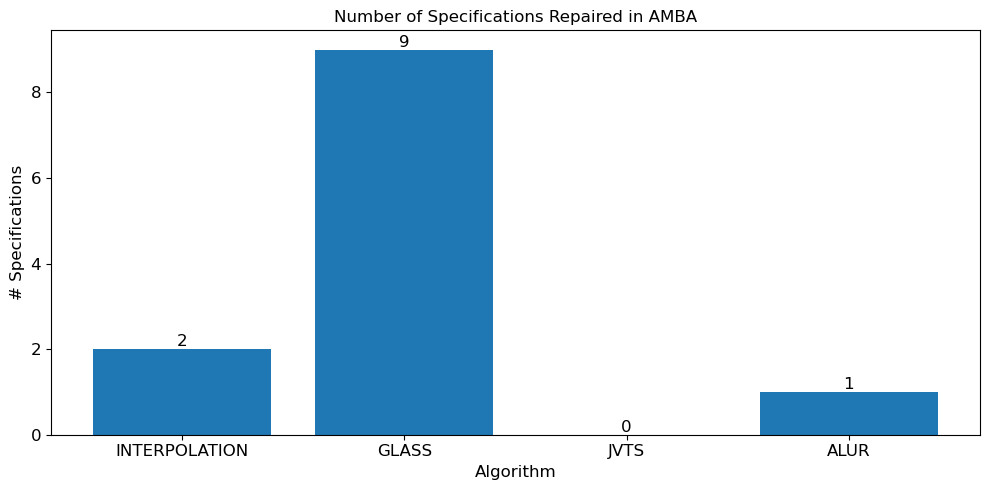

In [17]:
plot_num_specs_repaired("AMBA")

### SYNTECH15-UNREAL

In [18]:
display_percentage_specs_repaired("SYNTECH15-UNREAL", TOTAL_SYNTECH15_UNREAL_SPECS)

| Algorithm | Num Repaired | Percentage Repaired |
|-----------|--------------|--------------------|
| INTERPOLATION | 5 | 35.7% |
| GLASS | 12 | 85.7% |
| JVTS | 5 | 35.7% |
| ALUR | 2 | 14.3% |


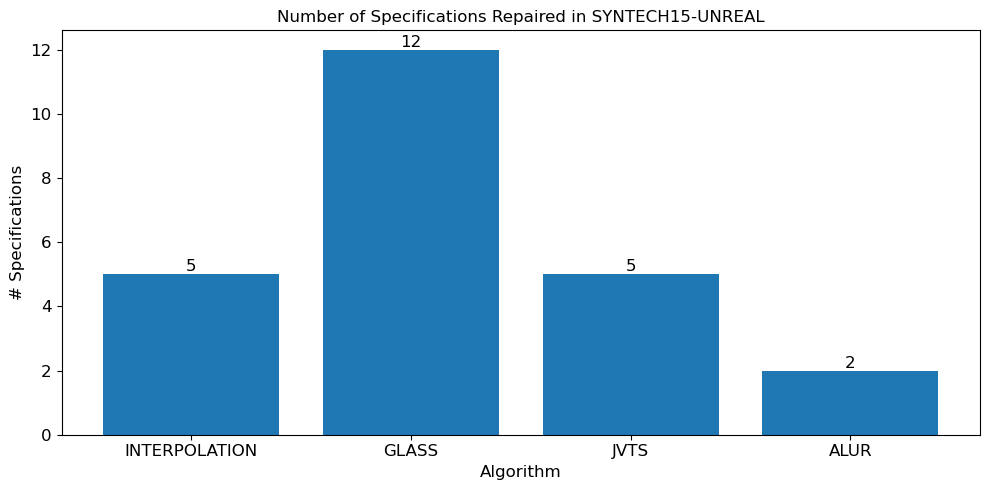

In [19]:
plot_num_specs_repaired("SYNTECH15-UNREAL")

### SYNTECH15-1UNREAL

In [20]:
display_percentage_specs_repaired("SYNTECH15-1UNREAL", TOTAL_SYNTECH15_1UNREAL_SPECS)

| Algorithm | Num Repaired | Percentage Repaired |
|-----------|--------------|--------------------|
| INTERPOLATION | 48 | 36.9% |
| GLASS | 99 | 76.2% |
| JVTS | 26 | 20.0% |
| ALUR | 12 | 9.2% |


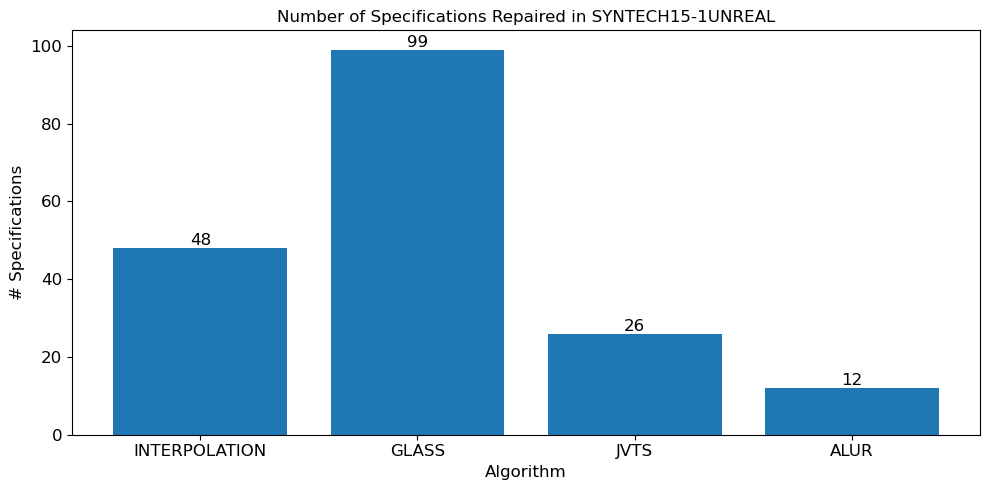

In [21]:
plot_num_specs_repaired("SYNTECH15-1UNREAL")

## Number of Variables

### AMBA

In [22]:
display_percentage_small_repairs("AMBA")

| Algorithm | Num Repaired | Num Small Repairs | Percentage Small Repairs |
|-----------|--------------|-------------------|-------------------------|
| INTERPOLATION | 2 | 2 | 100.0% |
| GLASS | 9 | 4 | 44.4% |
| JVTS | 0 | 0 | 0.0% |
| ALUR | 1 | 1 | 100.0% |


### SYNTECH15-UNREAL

In [23]:
display_percentage_small_repairs("SYNTECH15-UNREAL")

| Algorithm | Num Repaired | Num Small Repairs | Percentage Small Repairs |
|-----------|--------------|-------------------|-------------------------|
| INTERPOLATION | 5 | 5 | 100.0% |
| GLASS | 12 | 6 | 50.0% |
| JVTS | 5 | 4 | 80.0% |
| ALUR | 2 | 2 | 100.0% |


### SYNTECH15-1UNREAL

In [24]:
display_percentage_small_repairs("SYNTECH15-1UNREAL")

| Algorithm | Num Repaired | Num Small Repairs | Percentage Small Repairs |
|-----------|--------------|-------------------|-------------------------|
| INTERPOLATION | 48 | 48 | 100.0% |
| GLASS | 99 | 53 | 53.5% |
| JVTS | 26 | 15 | 57.7% |
| ALUR | 12 | 12 | 100.0% |
